## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [1]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [2]:
#2 Check the shape of the DataFrame (rows, columns)
df.shape

(545, 13)

In [3]:
#3 Look at the data types of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [16]:
#4 Check for missing  values if any, replace with appropriate values
df.isnull().sum()
df.fillna(df.mean,inplace=True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [27]:
#5 Prepare  X (independent variables) and y (dependent variable)

X = df[["area","bathrooms","bedrooms"]]
y = df["price"]

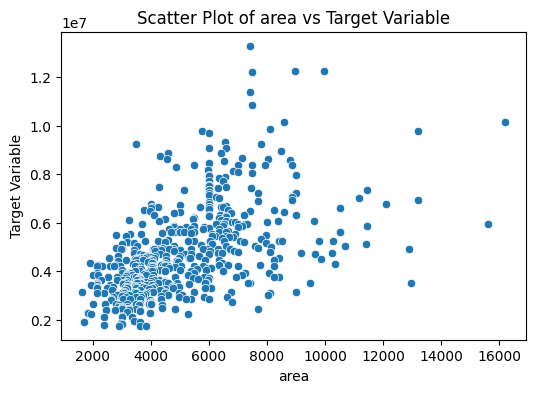

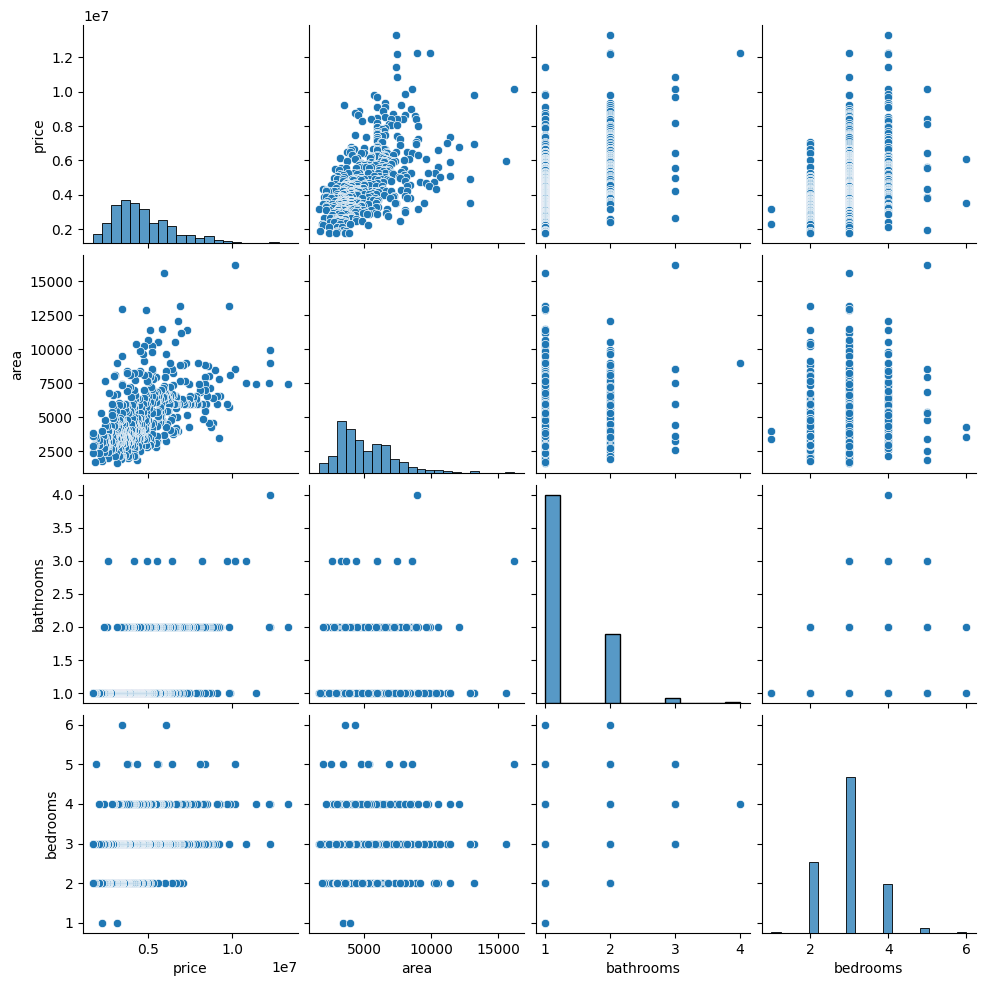

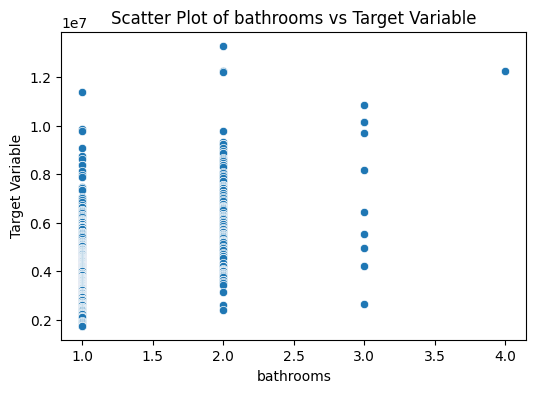

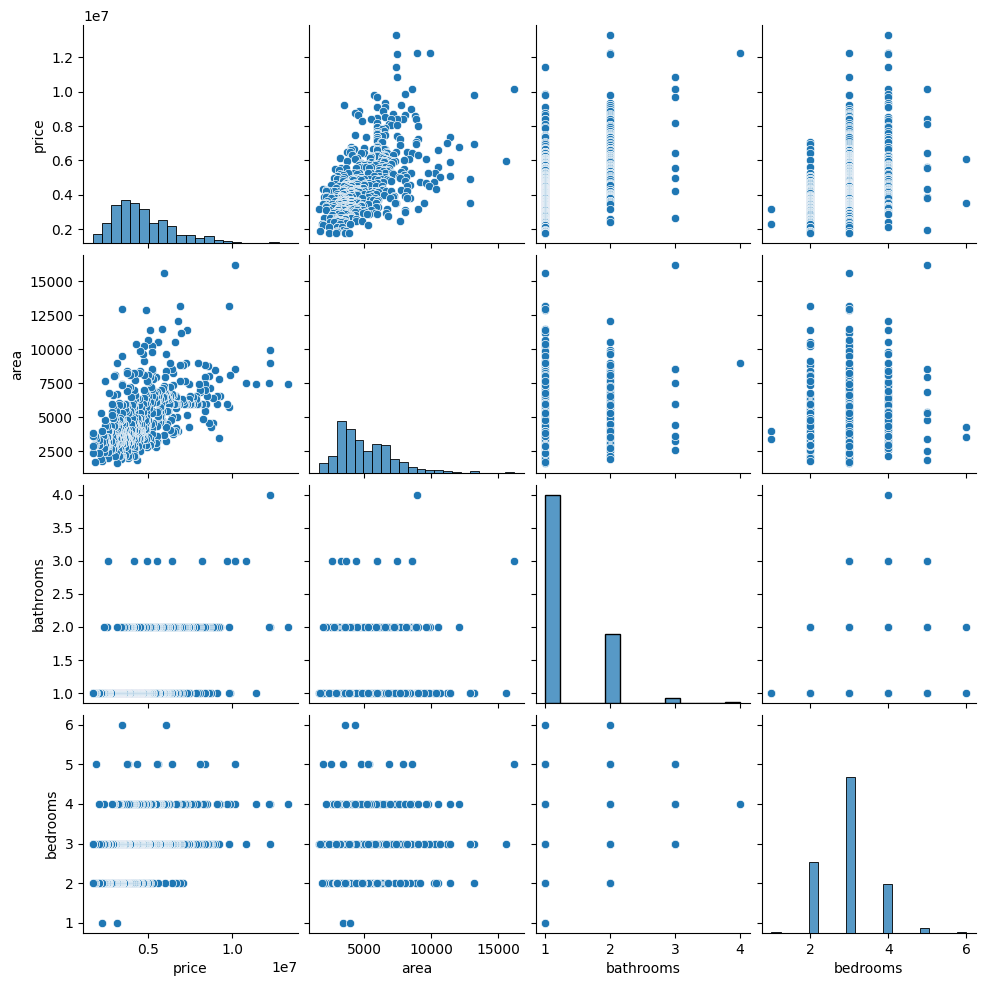

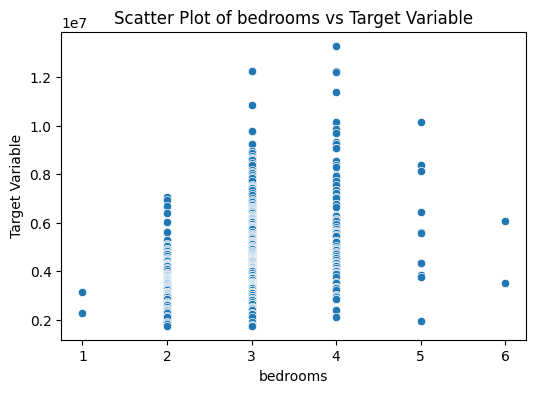

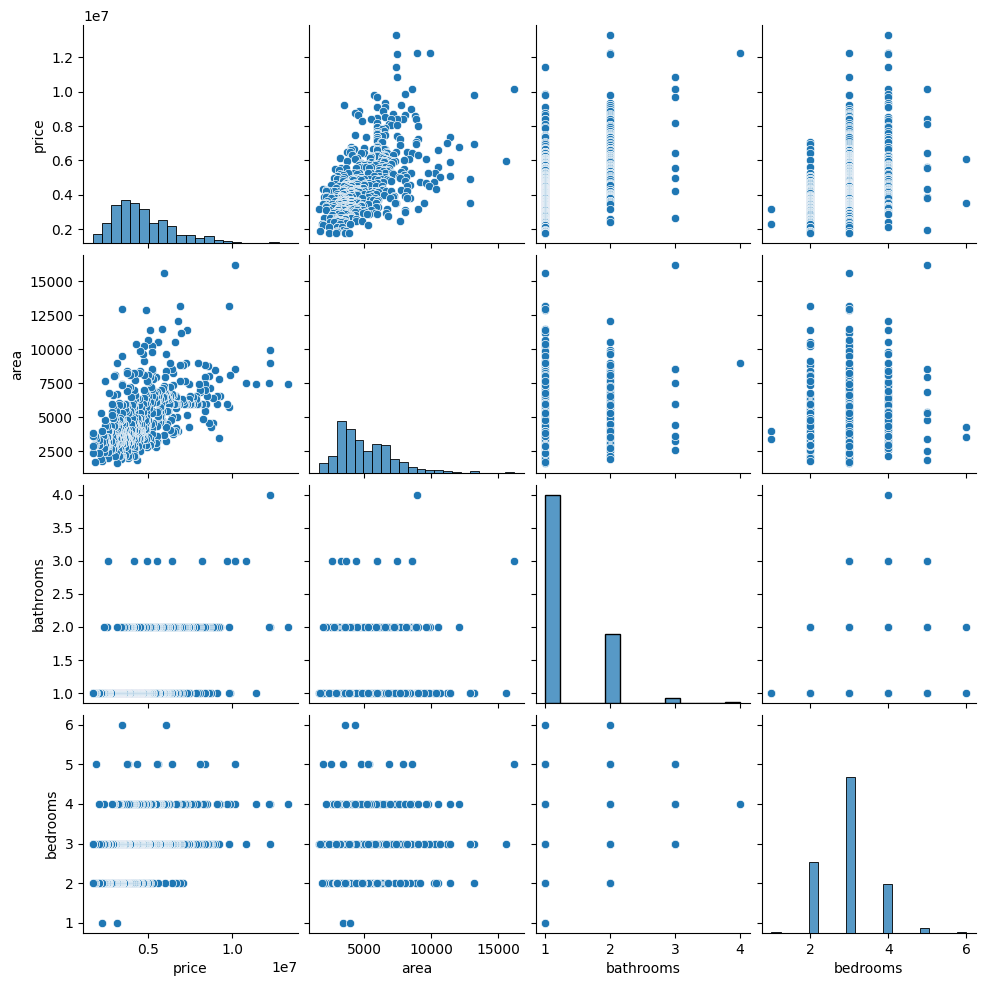

In [32]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import matplotlib.pyplot as plt
import seaborn as sns
for column in X.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X[column], y=y)
    plt.xlabel(column)
    plt.ylabel("Target Variable")
    plt.title(f"Scatter Plot of {column} vs Target Variable")

    df_subset = df[["price"] + list(X.columns)]
    sns.pairplot(df_subset, kind="scatter")
    plt.show()



In [34]:
#7 Encoding categorical data in X
import pandas as pd
df = pd.read_csv('Housing.csv')
X = df[['bedrooms', 'area', 'bathrooms','mainroad']]
X_encoded = pd.get_dummies(X, columns=['mainroad'], drop_first=True)
print(X_encoded)

     bedrooms  area  bathrooms  mainroad_yes
0           4  7420          2          True
1           4  8960          4          True
2           3  9960          2          True
3           4  7500          2          True
4           4  7420          1          True
..        ...   ...        ...           ...
540         2  3000          1          True
541         3  2400          1         False
542         2  3620          1          True
543         3  2910          1         False
544         3  3850          1          True

[545 rows x 4 columns]


In [35]:
#8  Avoiding the Dummy Variable Trap
from sklearn.preprocessing import LabelEncoder
X = df[['bedrooms', 'area', 'bathrooms', 'mainroad']]

le = LabelEncoder()
X['mainroad'] = le.fit_transform(X['mainroad'])
print(X)

     bedrooms  area  bathrooms  mainroad
0           4  7420          2         1
1           4  8960          4         1
2           3  9960          2         1
3           4  7500          2         1
4           4  7420          1         1
..        ...   ...        ...       ...
540         2  3000          1         1
541         3  2400          1         0
542         2  3620          1         1
543         3  2910          1         0
544         3  3850          1         1

[545 rows x 4 columns]


C:\Users\anike\AppData\Local\Temp\ipykernel_9624\4208432837.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mainroad'] = le.fit_transform(X['mainroad'])


In [42]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the dataset
df= pd.read_csv('Housing.csv')

# Selecting numerical columns for scaling
num_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# **1️⃣ Applying Min-Max Scaling (Normalization)**
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[num_cols] = minmax_scaler.fit_transform(df[num_cols])

# **2️⃣ Applying Standardization (Z-score Scaling)**
standard_scaler = StandardScaler()
df_standard = df.copy()
df_standard[num_cols] = standard_scaler.fit_transform(df[num_cols])

# Display the first few rows after scaling
print("Min-Max Scaled Data:\n", df_minmax.head())
print("\nStandardized Data:\n", df_standard.head())


Min-Max Scaled Data:
       price      area  bedrooms  bathrooms   stories mainroad guestroom  \
0  1.000000  0.396564       0.6   0.333333  0.666667      yes        no   
1  0.909091  0.502405       0.6   1.000000  1.000000      yes        no   
2  0.909091  0.571134       0.4   0.333333  0.333333      yes        no   
3  0.906061  0.402062       0.6   0.333333  0.333333      yes        no   
4  0.836364  0.396564       0.6   0.000000  0.333333      yes       yes   

  basement hotwaterheating airconditioning   parking prefarea furnishingstatus  
0       no              no             yes  0.666667      yes        furnished  
1       no              no             yes  1.000000       no        furnished  
2      yes              no              no  0.666667      yes   semi-furnished  
3      yes              no             yes  1.000000      yes        furnished  
4      yes              no             yes  0.666667       no        furnished  

Standardized Data:
       price      are

In [ ]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("Housing.csv")

# Define features (X) and target variable (y)
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]  # Independent variables
y = df['price']  # Target variable

# Split the data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape:      area  bedrooms  bathrooms  stories  parking
126  7160         3          1        1        2
363  3584         2          1        1        0
370  4280         2          1        1        2
31   7000         3          1        4        2
113  9620         3          1        1        2
..    ...       ...        ...      ...      ...
71   6000         4          2        4        0
106  5450         4          2        1        0
270  4500         3          2        3        1
435  4040         2          1        1        0
102  5500         3          2        4        1

[381 rows x 5 columns]
X_test shape: (164, 5)
y_train shape: (381,)
y_test shape: (164,)


In [ ]:
#11 Fitting Multiple Linear Regression to the Training

In [ ]:
#12 Predict on the train set and calculate the error = y_pred - y_train

In [ ]:
#13  Residual plot - plot y_pred in x axis and errors in y axis

In [ ]:
#14  Predic on the test set

In [ ]:
#15 Residual plot - plot y_pred in x axis and errors in y axis

In [ ]:
#16 Print Mean Squared Error and R Squared Value

In [ ]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)